In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df = pd.read_csv('dataset.csv')

In [2]:
df = df.set_index('Unnamed: 0')
y = df.label
df = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [3]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [4]:
count_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [5]:
tfidf_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [6]:
models = []
models.append(('PAC',PassiveAggressiveClassifier(max_iter=50)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC(gamma='auto')))

In [11]:
results = []
names = []
for name, model in models:
    model.fit(count_train, y_train)
    pred = model.predict(count_test)
    score = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
    print("{0} : Confusion Matrix {1}".format(name,cm))
    print('%s: %f' % (name, score))
    print("***************************")
    print(classification_report(y_test, pred))
    names.append(name)
    results.append(score)

PAC : Confusion Matrix [[911  97]
 [121 962]]
PAC: 0.895744
***************************
              precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89      1008
        REAL       0.91      0.89      0.90      1083

    accuracy                           0.90      2091
   macro avg       0.90      0.90      0.90      2091
weighted avg       0.90      0.90      0.90      2091

LR : Confusion Matrix [[948  60]
 [128 955]]
LR: 0.910091
***************************
              precision    recall  f1-score   support

        FAKE       0.88      0.94      0.91      1008
        REAL       0.94      0.88      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091

KNN : Confusion Matrix [[838 170]
 [261 822]]
KNN: 0.793879
***************************
              precision    recall  f1-score   support

        FAKE       0.76      

In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.66      0.97      0.78      1008
        REAL       0.94      0.53      0.68      1083

    accuracy                           0.74      2091
   macro avg       0.80      0.75      0.73      2091
weighted avg       0.81      0.74      0.73      2091



<BarContainer object of 6 artists>

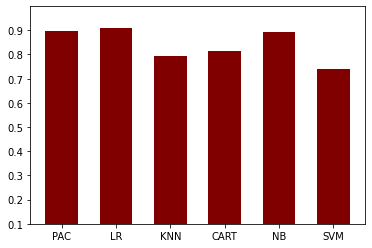

In [13]:
pyplot.ylim(.100, .999)
pyplot.bar(names, results, color ='maroon', width = 0.6)

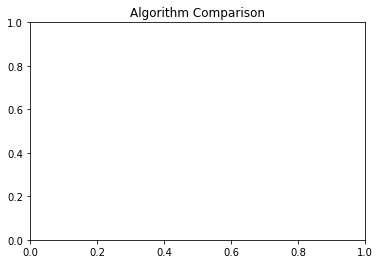

In [14]:
pyplot.title('Algorithm Comparison')
pyplot.show()